In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation = "softmax")
])

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer = "sgd",loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

In [9]:
history = model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.7325 - loss: 1.0406 - val_accuracy: 0.8996 - val_loss: 0.3592
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.9026 - loss: 0.3545 - val_accuracy: 0.9188 - val_loss: 0.2956
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.9157 - loss: 0.2982 - val_accuracy: 0.9274 - val_loss: 0.2652
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.9237 - loss: 0.2711 - val_accuracy: 0.9324 - val_loss: 0.2394
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9317 - loss: 0.2427 - val_accuracy: 0.9387 - val_loss: 0.2217
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9385 - loss: 0.2223 - val_accuracy: 0.9420 - val_loss: 0.2054
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - accuracy: 0.9446 - loss: 0.2033 - val_accuracy: 0.9444 - val_loss: 0.1926
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9477 -

In [11]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - accuracy: 0.9464 - loss: 0.1878
Loss=0.163
Accuracy=0.955


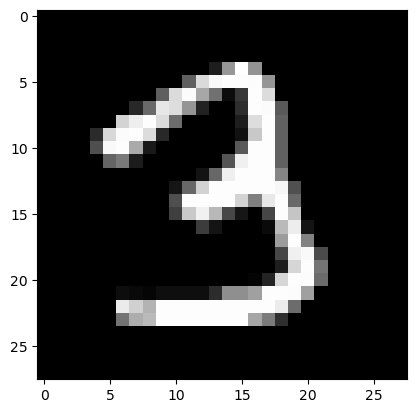

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
Predicted Value: 3


In [19]:
n = random.randint(0, 9999)
plt.imshow(x_test[n], cmap='gray')
plt.show()
predicted_value = model.predict(x_test)
print('Predicted Value:', predicted_value[n].argmax())

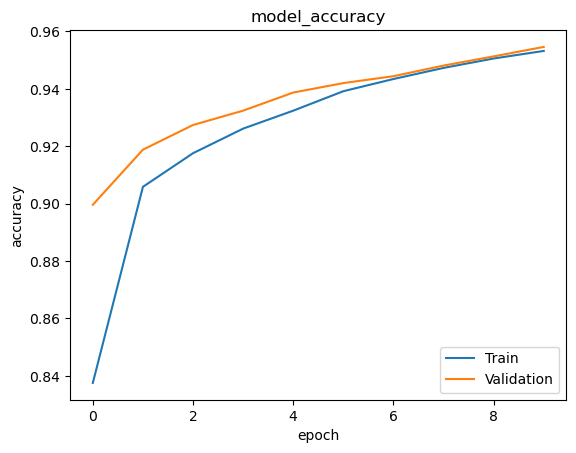

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train","Validation"], loc = "lower right")
plt.show()

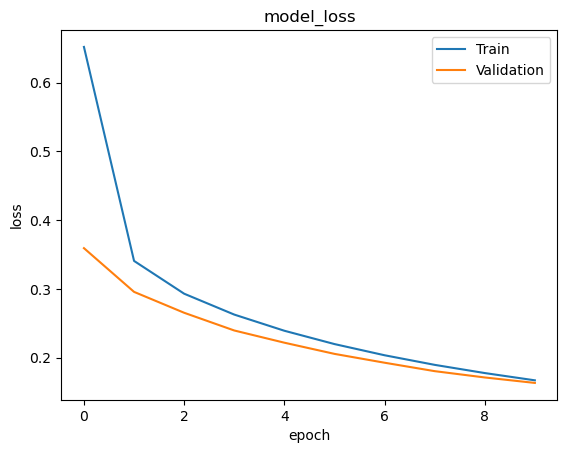

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["Train","Validation"],loc = "upper right")
plt.show()